In [4]:
import pandas as pd 
import numpy as np
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
df=pd.read_csv('creditcard.csv')
df.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [6]:
x=df.iloc[:,:-1]
y=df['Class']
x_scaled=scale(x)
pca=PCA(n_components=2)
x_reduced=pca.fit_transform(x_scaled)
x_train,x_test,y_train,y_test=train_test_split(x_reduced,y,test_size=0.33,random_state=500)

In [4]:
kmeans=KMeans(n_clusters=2,n_init=10)
kmeans.fit(x_train)

KMeans(n_clusters=2)

In [5]:
ypredicted=kmeans.fit_predict(x_reduced,y)
ypredicted

array([1, 1, 1, ..., 0, 0, 0])

In [6]:
df['cluster']=ypredicted
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,cluster
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,0


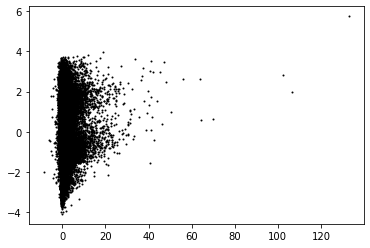

In [7]:
plt.plot(x_reduced[:, 0], x_reduced[:, 1], 'k.', markersize=2)
center=kmeans.cluster_centers_
plt.scatter(center[:,0],center[:,1],marker='*',color='w',s=169, linewidths=3)

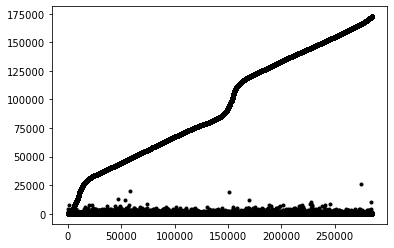

In [8]:
plt.plot(df.iloc[:,:],'k.' )

In [9]:
df.iloc[:,8]

0         0.098698
1         0.085102
2         0.247676
3         0.377436
4        -0.270533
            ...   
284802    7.305334
284803    0.294869
284804    0.708417
284805    0.679145
284806   -0.414650
Name: V8, Length: 284807, dtype: float64

In [10]:
predictions=kmeans.predict(x_test)
predictions

array([1, 1, 1, ..., 1, 1, 0])

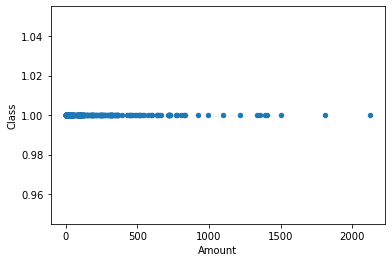

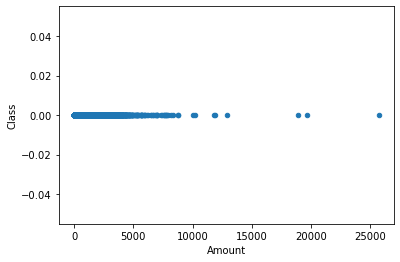

In [11]:

frauds=df.loc[df['Class']==1]
frauds.plot.scatter(x='Amount',y='Class')
non_frauds=df.loc[df['Class']==0]
non_frauds.plot.scatter(x='Amount',y='Class')
plt.show()

In [12]:
from sklearn import linear_model


In [14]:
reg=linear_model.LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [18]:
ypredict=np.array(reg.predict(x_test))
ypredict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
yright=np.array(y_test)

In [21]:
len(x_train)

190820

In [27]:
y_train.value_counts()

0    190494
1       326
Name: Class, dtype: int64

In [28]:
pip install imbalanced-learn

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\sazzad555\\anaconda3\\Lib\\site-packages\\~-learn\\.libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
pip install imbalanced-learn

  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)



In [3]:
from imblearn.over_sampling import SMOTE

In [11]:
smote=SMOTE(sampling_strategy='minority')
x_sm,y_sm=smote.fit_resample(x,y)
y_sm.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.33,random_state=500)

In [ ]:
log